## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
#X = np.random.uniform(0, 21, 50)
X = np.linspace(0, 20)
Y = (-2*X) + 1

In [3]:
print("Features are:\n\n", X)
print("\nOutput is:\n\n", Y)

Features are:

 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]

Output is:

 [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.

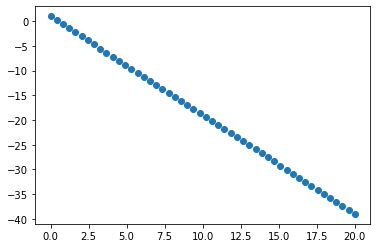

In [8]:
plt.scatter(X,Y)
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [9]:
# def gradient_descent(X, Y, alpha, num_iter):
#     m = len(X)
#     theta0 = 0
#     theta1 = 0
    
#     E = []
#     H = []
#     All_costs = []
#     All_theta0 = []
#     All_theta1 = []
    
#     for j in range(num_iter):
#         # one epoch
#         for i in range(m):
#             # calculating h and error for all data points 
#             h = theta0 + (theta1*X[i])
#             H.append(h)
#             error = h-Y[i]
#             E.append(error)
#             print(h)
#         # calculating the parameters for one epoch
#         cost = (1/(2*m)) * ((sum(E))**2)
#         All_costs.append(cost)
        
#         gradient0 = (1/m) * (sum(E))
#         gradient1 = (1/m) * ((sum(E))*X)

#         theta0 = theta0 - (alpha*gradient0)
#         theta1 = theta1 - (alpha*gradient1)
        
#         All_theta0.append(theta0)
#         All_theta1.append(theta0)
        
    
#     #print(theta0)
#     #return ((theta0, theta1), All_theta0, All_theta1, All_costs, H)

In [10]:
Y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

In [73]:
def gradient_descent(X, Y, alpha, num_iter):
    m = len(Y)
    cost_list = []
    thetas0 = []
    thetas1= []
    Hs = []
    theta1 = 0
    theta0 = 0
 
    for i in range(num_iter):
            # calculating model equation
            h = theta0+ (theta1*X)
            Hs.append(h)
            # calculating cost
            c = (h-Y)**2
            cost = (sum(c))/(2*m)
            #print(cost)
            cost_list.append(cost)
            
                
            # update theta
            gradient_theta0 = ((h-Y).sum())/m
            gradient_theta1 = (((h-Y)*X).sum())/m
            theta0 = theta0 - alpha*gradient_theta0
            theta1 = theta1 - alpha*gradient_theta1
            #print( gradient_theta0)

            thetas0.append(theta0)
            thetas1.append(theta1)
            if cost<0.1:
                break
    return(cost_list, thetas0, thetas1, Hs)


#### Try your function with any input parameterss of your choice.

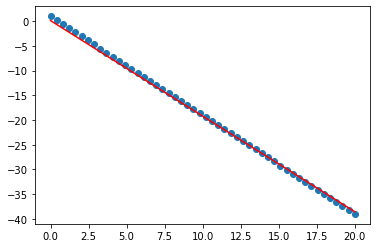

In [74]:
alpha = 0.01
num_iter = 500
cost_list, thetas0, thetas1, H = gradient_descent(X, Y, alpha, num_iter)

plt.scatter(X,Y)
plt.plot(X,H[-1], color = 'red')
plt.show()

In [75]:
prediction = thetas0[-1] + (thetas1[-1]* 5)
prediction

-9.550956647657484

#### Calculate r2 score

In [76]:
mean = sum(Y) / len(Y)

ss_res = ((Y - h)**2).sum()
ss_tot = ((Y - mean)**2).sum()

r2 = 1 - (ss_res / ss_tot)

print(r2)

0.9976983427216174


#### Plot loss vs. epochs

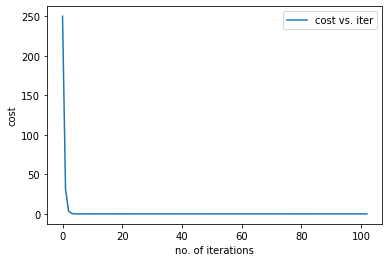

In [77]:
# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")

plt.xlabel("no. of iterations")
plt.ylabel("cost")

plt.legend()
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

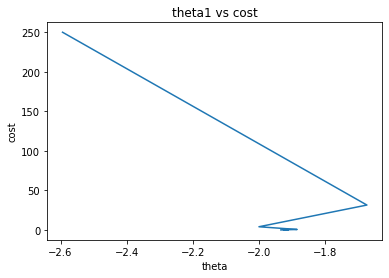

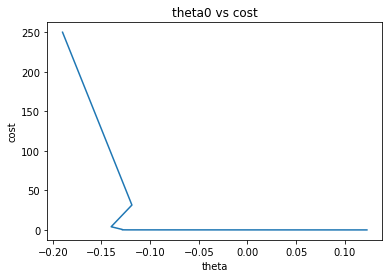

In [78]:
# plotting thetas vs cost

plt.plot(thetas1, cost_list)
plt.title('theta1 vs cost')

plt.xlabel("theta")
plt.ylabel("cost")

# plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')

plt.xlabel("theta")
plt.ylabel("cost")
plt.show()

#### Plot all regression lines till converge

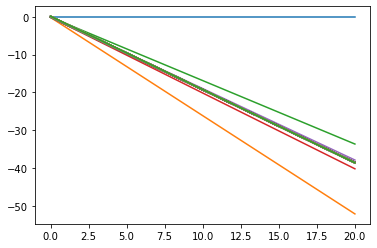

In [82]:
#temp = H[950:]
for i in H:
    plt.plot(X, i)
plt.show()

#### Plot the best regression line

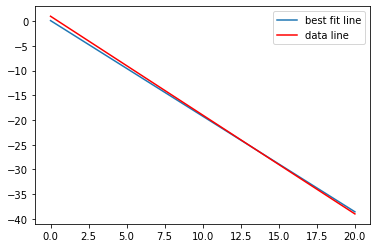

In [80]:
plt.plot(X, H[-1], label = 'best fit line')
plt.plot(X,Y, color ='red', label = 'data line')
plt.legend()
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

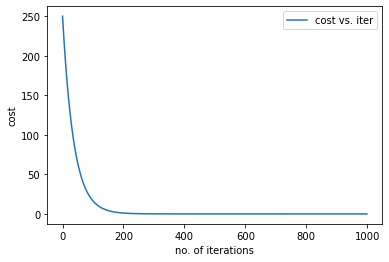

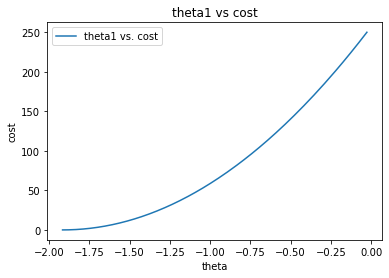

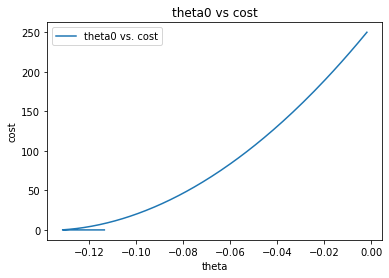

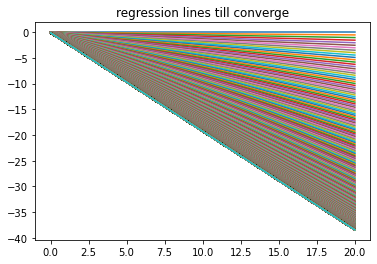

In [88]:
alpha = 0.0001
num_iter = 1000
cost_list, thetas0, thetas1, H = gradient_descent(X, Y, alpha, num_iter)

# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()



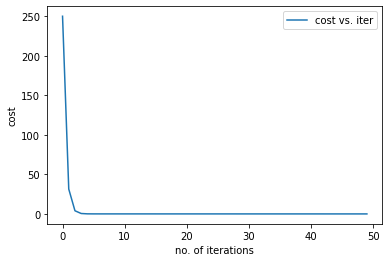

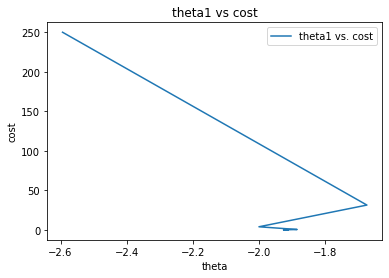

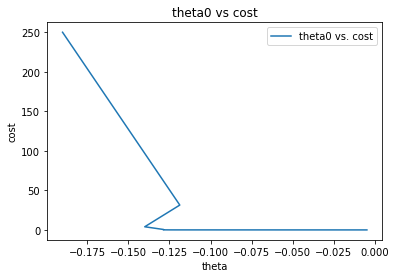

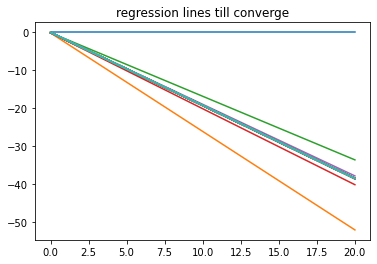

In [89]:
alpha = 0.01
num_iter = 50
cost_list, thetas0, thetas1, H = gradient_descent(X, Y, alpha, num_iter)

# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()



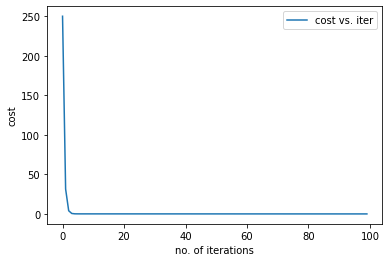

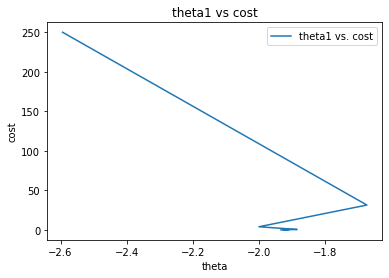

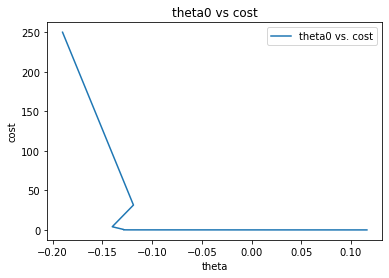

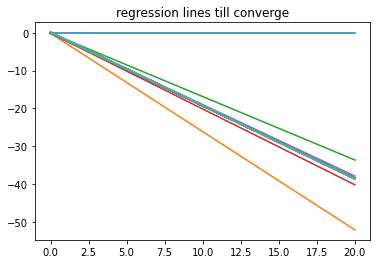

In [93]:
alpha = 0.01
num_iter = 100
cost_list, thetas0, thetas1, H = gradient_descent(X, Y, alpha, num_iter)

# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()



#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [50]:
def mini_batch_GD(X, Y, batch_size, alpha, num_iter):
#     print(len(X))
    m = len(Y)
    cost_list = []
    thetas0 = []
    thetas1= []
    Hs = []
    h_batch = []
    theta1 = 0
    theta0 = 0
 
    for j in range(num_iter):
        for i in range(0, m+1, batch_size):
            # calculating model equation
            end = i + batch_size
#             print(i)
#             print(m)
            if end == m:
                break
            h = theta0+ (theta1*X[i:end])
            h_batch.append(h)
            # calculating cost
            c = (h-Y[i:end])**2
            cost = (sum(c))/(2*batch_size)
#             print(cost)
#             cost_list.append(cost)


            # update theta
            gradient_theta0 = ((h-Y[i:end]).sum())/batch_size
            gradient_theta1 = (((h-Y[i:end])*X[i:end]).sum())/batch_size
            theta0 = theta0 - alpha*gradient_theta0
            theta1 = theta1 - alpha*gradient_theta1
#             print(theta0, theta1)
            #print( gradient_theta0)

#             thetas0.append(theta0)
#             thetas1.append(theta1)
#         print(cost)
        Hs.append(h_batch)
        cost_list.append(cost)
        thetas0.append(theta0)
        thetas1.append(theta1)
        if cost<0.001:
            break
    h = theta0 + (theta1*X)
    return(cost_list, thetas0, thetas1, Hs, h)


In [55]:
alpha = 0.01
num_iter = 50
cost_list, thetas0, thetas1, H, h= mini_batch_GD(X, Y, 5, alpha, num_iter)

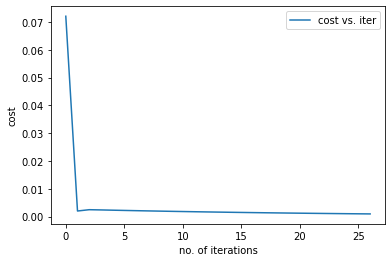

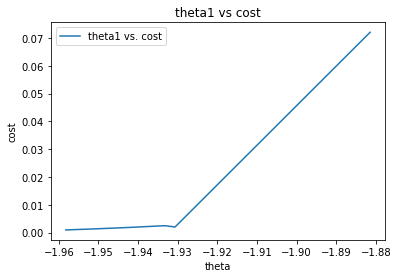

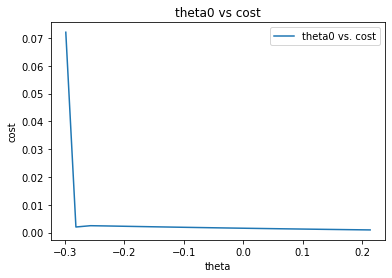

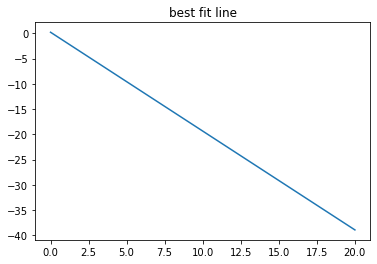

In [63]:

# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




# for i in H:
#     plt.plot(X, i)
# plt.title('regression lines till converge')
# #plt.legend()
# plt.show()


plt.plot(X, h)
plt.title('best fit line')
plt.show()
# print(h)

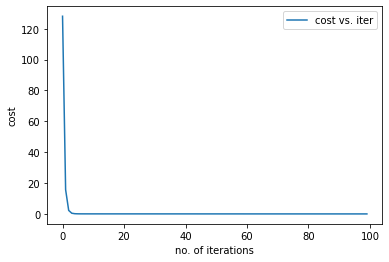

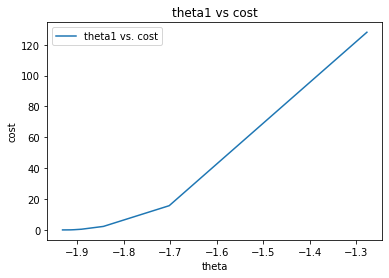

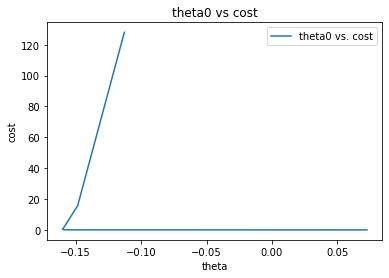

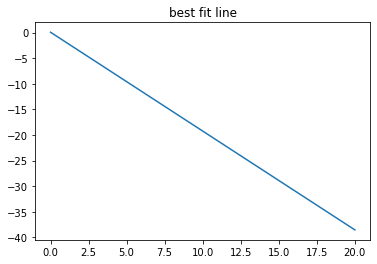

In [64]:
alpha = 0.001
num_iter = 100
cost_list, thetas0, thetas1, H, h= mini_batch_GD(X, Y, 5, alpha, num_iter)


# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()


plt.plot(X, h)
plt.title('best fit line')
plt.show()
# print(h)


## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [99]:
def stochastic_GD(X, Y, alpha, num_iter):
    m = len(X)
    theta0 = 0
    theta1 = 0
    
    E = []
    H = []
    All_costs = []
    All_theta0 = []
    All_theta1 = []
    
    for j in range(num_iter):
        # one epoch
        for i in range(m):
            # calculating h and error for all data points 
            h = theta0 + (theta1*X[i])
            H.append(h)
            error = h-Y[i]
            E.append(error)
            
            cost = error**2
#             print(cost)
            gradient0 = 2*error
            gradient1 = 2*error *X[i]
            theta0 = theta0 - (alpha*gradient0)
            theta1 = theta1 - (alpha*gradient1)
#             print(h)
#         print(theta0, theta1)
#         c = (h-Y)**2
#         coost = (sum(c))/(2*m)
#         print(cost)
        All_costs.append(cost)

        All_theta0.append(theta0)
        All_theta1.append(theta1)
#         All_costs.append(coost)
        prediction = theta0 + (theta1*X)
        if cost<0.001:
            break
    return (All_costs, All_theta0, All_theta1, prediction )

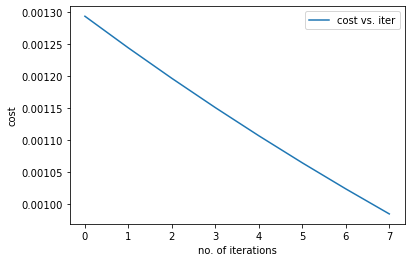

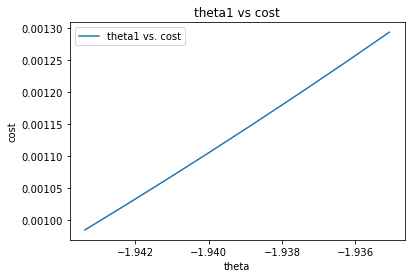

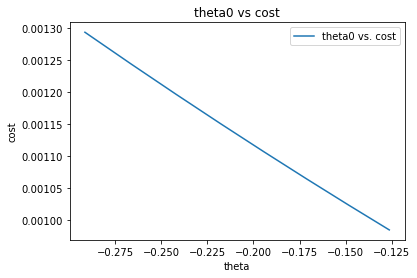

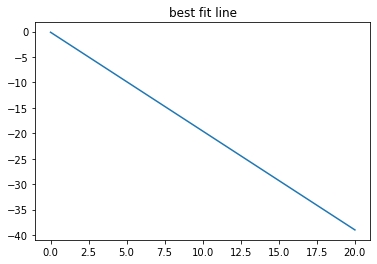

In [101]:
alpha = 0.001
num_iter = 2000
cost_list, thetas0, thetas1, h= stochastic_GD(X, Y, alpha, num_iter)

# print(cost_list)
# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()


plt.plot(X, h)
plt.title('best fit line')
plt.show()
# print(h)


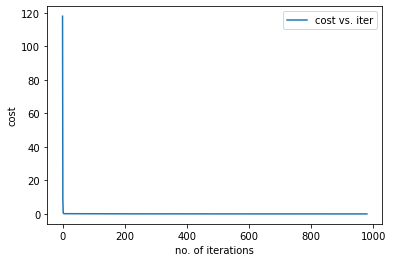

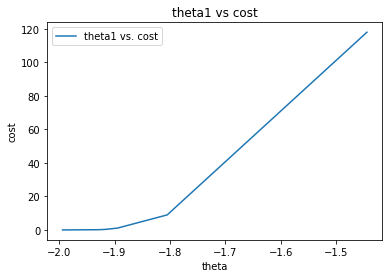

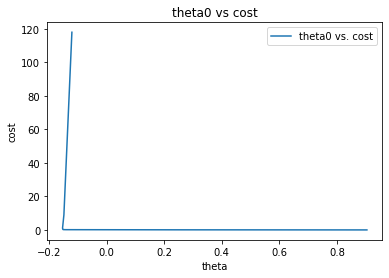

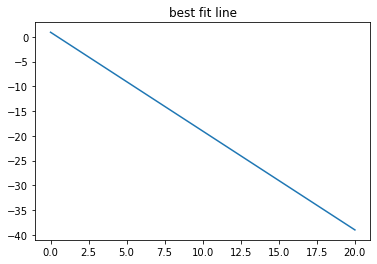

In [106]:
alpha = 0.0001
num_iter = 1000
cost_list, thetas0, thetas1, h= stochastic_GD(X, Y, alpha, num_iter)

# print(cost_list)
# plotting cost vs iter
plt.plot(range(len(cost_list)), cost_list, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1, cost_list, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0, cost_list, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()


plt.plot(X, h)
plt.title('best fit line')
plt.show()
# print(h)
